In [3]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('tensorflow version', tf.__version__)
bank_data = pd.read_csv('data/1_american_dataset.csv')
# data_features = pd.read_csv('data/bankrupt_features.csv')
# data_status = pd.read_csv('data/status_bankrupt.csv')

tensorflow version 2.11.0


In [4]:
from sklearn.model_selection import train_test_split

numerical_only = bank_data.select_dtypes(include=['float64','int64'])
X = numerical_only.drop(['cik', 'fyear', 'status'], axis=1)
y = numerical_only["status"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
def bankruptcy_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        # tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=['accuracy'])
    return model

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.ModelCheckpoint(filepath='./best_model.h5', monitor='val_loss', save_best_only=True)
]

In [112]:
# import os

# # save results to csv file 
# def save_results(model, file_path,loss_func, activation_func, epochs, batch_size, history):
#     results = model.evaluate(X_test, y_test)
#     loss = round(results[0],6)
#     accuracy = round(results[1], 6)
#     metrics = {'loss': loss, 'accuracy': accuracy}
    
#     df_metrics = pd.DataFrame(metrics, index=[0])
#     df_metrics['epochs'] = epochs
#     df_metrics['batch_size'] = batch_size
#     df_metrics['loss_function'] = loss_func
#     df_metrics['activation_func'] = ', '.join(activation_func)
#     s1 = ', '.join(str(x) for x in history.history['loss'])
#     s2 = ', '.join(str(x) for x in history.history['val_loss'])
#     s3 = ', '.join(str(x) for x in history.history['accuracy'])
#     s4 = ', '.join(str(x) for x in history.history['val_accuracy'])
#     df_metrics['hist_loss'] = s1
#     df_metrics['hist_val_loss'] = s2
#     df_metrics['hist_accuracy'] = s3
#     df_metrics['hist_val_accuracy'] = s4
    
#     if not os.path.exists(file_path):
#         df_metrics.to_csv(file_path, index=False)
#     else:
#         df_results = pd.read_csv(file_path)
#         df_results = pd.concat([df_results, df_metrics], ignore_index=True)
#         df_results.to_csv(file_path, index=False)


In [176]:
model = bankruptcy_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=35,
                    callbacks=callbacks)

Epoch 1/35
1968/1968 [==============================] - 5s 2ms/step - loss: 11.4207 - accuracy: 0.8955 - val_loss: 3.0239 - val_accuracy: 0.9232
Epoch 2/35
1968/1968 [==============================] - 4s 2ms/step - loss: 6.6133 - accuracy: 0.9059 - val_loss: 4.8954 - val_accuracy: 0.9323
Epoch 3/35
1968/1968 [==============================] - 4s 2ms/step - loss: 3.6529 - accuracy: 0.9122 - val_loss: 2.3652 - val_accuracy: 0.8840
Epoch 4/35
1968/1968 [==============================] - 4s 2ms/step - loss: 2.5291 - accuracy: 0.9157 - val_loss: 1.0711 - val_accuracy: 0.9302
Epoch 5/35
1968/1968 [==============================] - 4s 2ms/step - loss: 1.0717 - accuracy: 0.9214 - val_loss: 0.8588 - val_accuracy: 0.9243
Epoch 6/35
1968/1968 [==============================] - 4s 2ms/step - loss: 0.9518 - accuracy: 0.9238 - val_loss: 0.9963 - val_accuracy: 0.9260
Epoch 7/35
1968/1968 [==============================] - 4s 2ms/step - loss: 0.6993 - accuracy: 0.9276 - val_loss: 0.3687 - val_accuracy

In [177]:
model.evaluate(X_test, y_test, verbose=2)

492/492 - 1s - loss: 0.2591 - accuracy: 0.9324 - 554ms/epoch - 1ms/step


[0.2590949237346649, 0.9323886632919312]

In [127]:
# save_results(model,'model_compare_results.csv','BinaryCrossentropy',['relu','sigmoid'],15,32, history)

492/492 [==============================] - 1s 2ms/step - loss: 1.7582 - accuracy: 0.9317


In [159]:
def plot_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Plot training & validation accuracy values
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Test'], loc='upper left')

    plt.show()

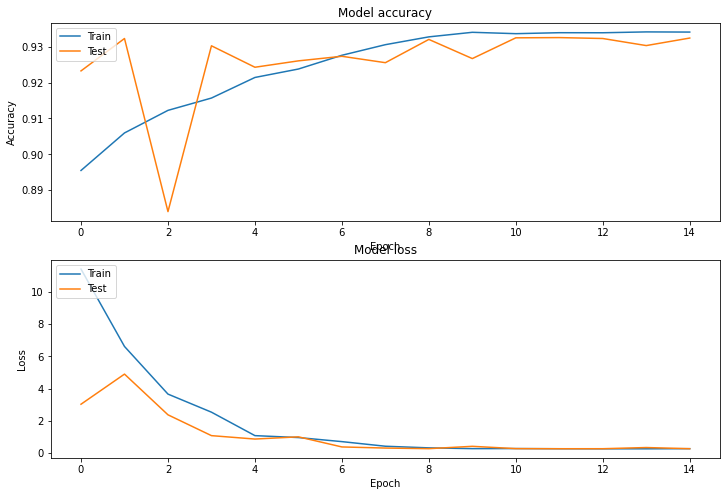

In [178]:
plot_history(history)

Text(0.5, 1.0, 'Correlation Matrix')

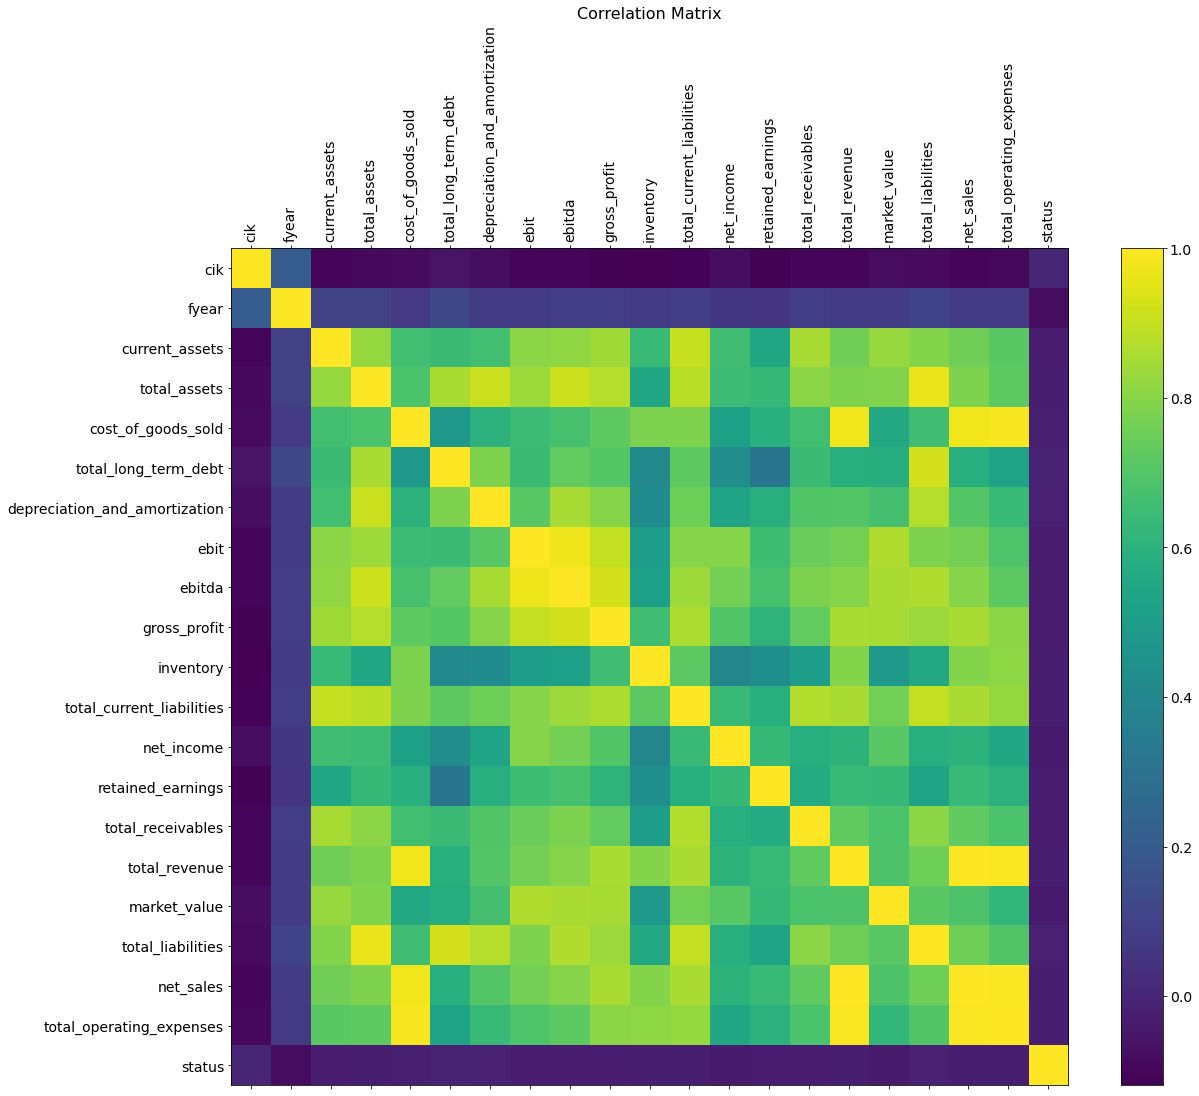

In [20]:
# Correlation Matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(bank_data.corr(), fignum=f.number)

# only select numerical values
plt.xticks(range(bank_data.select_dtypes(['number']).shape[1]), bank_data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(bank_data.select_dtypes(['number']).shape[1]), bank_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [21]:
# FIXME: Creare threshold (?) for predictions to make the only possible values 0 or 1
# Probably a better way to do this
predictions

array([[7.9327002e-02],
       [5.5738468e-02],
       [6.9394588e-02],
       ...,
       [4.8700053e-02],
       [1.3328383e-04],
       [9.4740182e-01]], dtype=float32)

In [15]:
# Confusion Matrix
# FIXME: Not workign yet due to predictions not beign 0 or 1

import seaborn as sns 
# Model improvement and Evaluation 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions))
print(cm)


ValueError: Classification metrics can't handle a mix of binary and continuous targets